# Coutning Dots

In [1]:
import numpy as np
from skimage import io, color, measure, filters, feature
import matplotlib.pyplot as plt

In [2]:
image = io.imread('polka.jpg')

First I'll check if the image is actually black and white. If not, I'll convert it so we can see the intensity of the pixels clearly.

In [3]:
len(image.shape) == 2

True

Becuase its already black and white, I'll just load the image as grayscale.

In [4]:
image = io.imread('polka.jpg', as_gray=True)
img = image.copy()

## Approach 1

My overall appraoch is to first reduce noise in the image, so that I can differentiate between the dots and the background. 

So my first step is to apply a Gaussian blur to the image. This will help to smooth out the image and reduce noise.

In [5]:
blurred = filters.gaussian(img, sigma=1)

Next I decided to use Thresholding, specifically Otsu's thresholding which I also used in my project 1. This method calculates the optimal threshold value using Otsu's method, which separates the dots from the background.

In [6]:
threshold_value = filters.threshold_otsu(blurred)

Now, assuming the dots are 'brighter' than the background, I will create a binary mask where the pixels with intensity greater than the threshold are set to white (dots), and others are set to black (background).

In [7]:
mask = blurred > threshold_value

Because the black pixels have a value of 0, we can just use `sum()` to count the number of white pixels. 

This will give us the area of all the dots combined in the image.

In [8]:
whites = np.sum(mask)

Now I just need to find a way to count the number of dots, based on the area of all the dots.

So I define a variable that is the persumed area of a single dot. I can then divide the total area by the area of a single dot to get the number of dots in the image.

(I did a lot of trial error to find the area that would correspond to the correct count)

In [9]:
areaEach = 730
count = whites // areaEach

Putting it all together we get:

In [10]:
def countDots1(img):
    blured = filters.gaussian(img, sigma=1)

    threshold_value = filters.threshold_otsu(blured)
    mask = blured > threshold_value
    
    whites = np.sum(mask)

    areaEach = 730
    count = whites // areaEach

    return f'Number of dots: {count}'

countDots1(img)

'Number of dots: 36'

## Approach 2

Now although this works. Its not very good practice to hard code the area of a single dot.

So upon looking into scikit-image, I found a function called `peak_local_max()` in the `skimage.feature` module. This function is used to find local maxima in an image, which can be useful for identifying dots in this case.

For this approach, again I first smooth the image using a Gaussian filter. But then apply this peak_local_max() function to find the coordinates of the local maxima in the image.

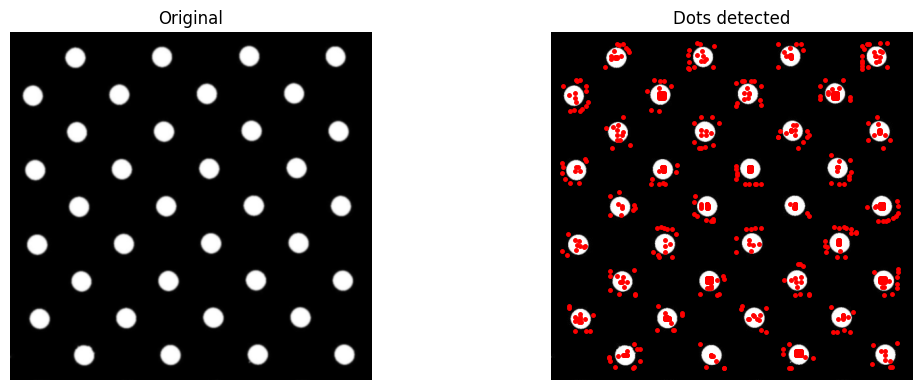

In [11]:
blurred = filters.gaussian(img, sigma=1)

coords = feature.peak_local_max(blurred)

plt.figure(figsize=(12, 4))
    
plt.subplot(121)
plt.imshow(blurred, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], 'r.', markersize=5)
plt.title('Dots detected')
plt.axis('off')
plt.tight_layout()
plt.show()

Obviously, this is identifying a lot of dots. To be honest, I dont know why or how exactly it works. 

But I can tell the function to have a constraint on the minimum distance between peaks. This will help to reduce the number of false positives and give a more accurate count of the dots. 

I tried with a couple of values to get it accurate.

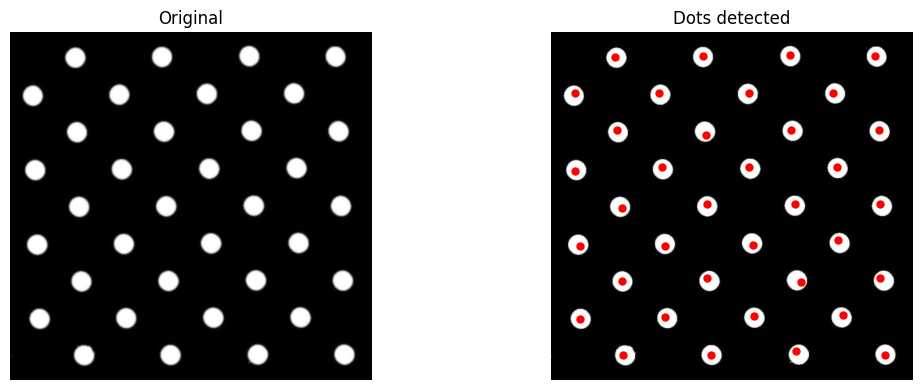

In [12]:
blurred = filters.gaussian(img, sigma=1)

coords = feature.peak_local_max(blurred, min_distance=20)

plt.figure(figsize=(12, 4))
    
plt.subplot(121)
plt.imshow(blurred, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], 'r.', markersize=10)
plt.title('Dots detected')
plt.axis('off')
plt.tight_layout()
plt.show()

Have in mind that this is not the same as hardcoding the area, as its a lot easier and more flexible to change the distance between peaks than the area of a dot. It also requires far less assumptions about the image.

So this function is better!

Putting it all together we get:

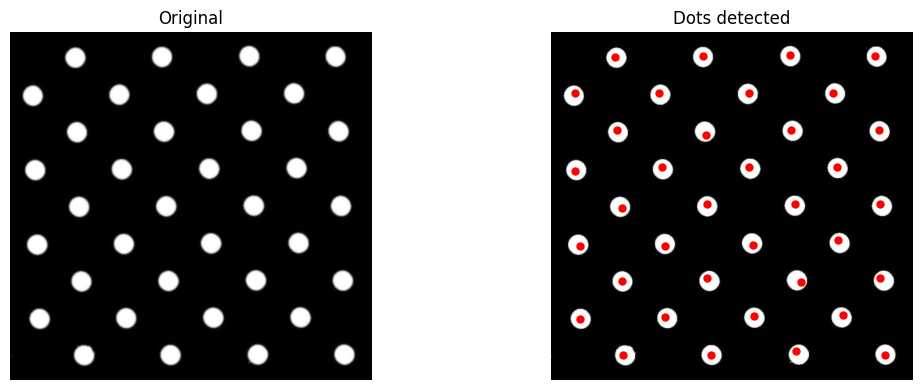

'Number of dots: 36'

In [13]:
def countDots2(img):
    blurred = filters.gaussian(img, sigma=1)

    coords = feature.peak_local_max(blurred, min_distance=20)
    
    plt.figure(figsize=(12, 4))
        
    plt.subplot(121)
    plt.imshow(blurred, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(img, cmap='gray')
    plt.plot(coords[:, 1], coords[:, 0], 'r.', markersize=10)
    plt.title('Dots detected')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    return f'Number of dots: {len(coords)}'

countDots2(img)

This was very fun :)